# Analyse the Optimal policy
This notebook presents the analysis of the optimal policy found per episode. Here, we compare the policy solutions found by the 3 strategies we have implemented in this work.

Let us start by importing the necessary *pkgs* and load the `pickle.files` with the results.

In [3]:
# Import packages
import numpy as np
import pandas as pd
import pickle as pkl
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Read pickle file
wok_dir = Path.cwd() / 'results/'
filename = 'sim_results_fixed_target_15.pkl'
path_file = wok_dir / filename
data = pkl.load(open(path_file, 'rb')) # Read file
# Plot parameters
plt_colmap = plt.get_cmap("tab20", 15)
sns.set_style("whitegrid")


In [37]:
## Define Plot functions

# Plot the policy per agent per episode
def plot_action_choice(policy, target, epi_id, y_lim, size=(10,8)):
    # Plot parameters
    no_steps = policy.shape[1]
    fig = plt.figure(figsize=size)
    x = np.arange(0, no_steps) # Steps of the episode (0 ... N)
    y1 = policy[0,:,epi_id].astype(int) # Partner selected per x-value (n_step)
    target = target * np.ones(no_steps) # Array of energy_target for all n_steps of the episode
    # Subplot 1
    ax1 = fig.add_subplot(311)
    ax1.scatter(x, y1, cmap=plt_colmap, c=y1, marker='.', alpha=1)
    ax1.set_ylim(0,y_lim)
    # Subplot 2
    ax2 = fig.add_subplot(312)
    ax2.plot(x, policy[4, :, epi_id])
    ax2.plot(x, policy[3, :, epi_id], alpha=0.5, linestyle='--')
    # Subplot 3
    ax3 = fig.add_subplot(313)
    ax3.bar(x, policy[1, :, epi_id])
    ax3.plot(x, policy[2, :, epi_id], color='cyan', marker='o')
    ax3.plot(x, target, color='red', linestyle='--')
    return fig, ax1, ax2, ax3


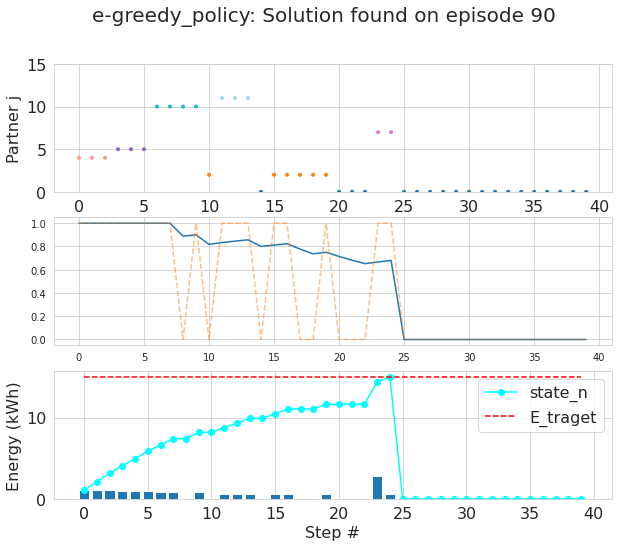

In [38]:
# Result data structure
pol_sol = data['policy_sol'] # Optimal policy per agent
e_target = data['simulation']['target'] # Energy target per episode (array)
ag_label = data['agents']['id'] # Agent type (Random, Epsilon-greedy, Thompson-Sampler)
no_offers = data['simulation']['environment'].no_offers # No of offers to trade with
no_epi = data['simulation']['episodes'] # Episodes #
# Plot parameters
ag_id = 1 # Agent type (0, 1, 2...)
epi_id = 90 # Episode id
ax_label = ['Step #', 'Partner j', 'Energy (kWh)']
ax_size = 16
fig, ax1, ax2, ax3 = plot_action_choice(pol_sol[ag_id], e_target[epi_id], epi_id, no_offers) # Make the plot
# Set labels and title of Subplot 1
ax1.set_xlabel(xlabel=ax_label[0], fontsize=ax_size)
ax1.set_ylabel(ylabel=ax_label[1], fontsize=ax_size)
ax1.tick_params(axis='x', labelsize=ax_size)
ax1.tick_params(axis='y', labelsize=ax_size)
# Set labels and title of Subplot 2
ax3.set_xlabel(xlabel=ax_label[0], fontsize=ax_size)
ax3.set_ylabel(ylabel=ax_label[2], fontsize=ax_size)
ax3.tick_params(axis='x', labelsize=ax_size)
ax3.tick_params(axis='y', labelsize=ax_size)
ax3.legend(['state_n', 'E_traget'], fontsize=ax_size, loc=0)
# Set title
#[ax[i].set_title(subplot_title[i], fontsize=18) for i in range(len(ax))]
fig.suptitle(f'{ag_label[ag_id]}: Solution found on episode {epi_id}', fontsize=20)
plt.show()